In [1]:
# import necessary library 
import os
import pandas as pd
import sqlite3 as db
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pprint import pprint


In [4]:
!wget -o wget-log -r -l 5 --spider https://www.kaggle.com/datasets/suddharshan/historical-stock-price-of-10-popular-companies/download?datasetVersionNumber=1

In [5]:
!cat wget-log

Spider mode enabled. Check if remote file exists.
--2023-03-26 22:07:29--  https://www.kaggle.com/datasets/suddharshan/historical-stock-price-of-10-popular-companies/download?datasetVersionNumber=1
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
Remote file does not exist -- broken link!!!

Found 1 broken link.

https://www.kaggle.com/datasets/suddharshan/historical-stock-price-of-10-popular-companies/download?datasetVersionNumber=1



The path to the files is broken and I had to download the 10 files into my local drive and then load them into the jupyter notebook.

In [ ]:
%load_ext sql
%sql sqlite:///stocks.db

In [ ]:
# Get the filenames of the dataset (the csv files) 
directory = 'C:/Users/GBOTEMI/Downloads/archive'
file_names = []

for file in os.listdir(directory):
    if file.endswith(".csv"):
        file_names.append(file)



In [ ]:
print(file_names)
print(f'There are {len(file_names)} files to be added to the database')

['Amazon.csv', 'Apple.csv', 'Facebook.csv', 'Google.csv', 'Microsoft.csv', 'Netflix.csv', 'Tesla.csv', 'Uber.csv', 'Walmart.csv', 'Zoom.csv']
There are 10 files to be added to the database


In [ ]:
# We can either connect to an existing database or create a new one if it doesn’t exist.

conn = db.connect('stocks.db')

In [ ]:
# In order to interact with our database, we now have to create a cursor.

cur = conn.cursor()

In [ ]:
# insert the csv files into the database (stocks.db) and check the number of entries in each table 
rows = []

for file_name in file_names:
    df = pd.read_csv(file_name)
    rows.append(df.shape[0])
    df.to_sql(file_name[:-4], conn, if_exists='replace')

    
# checking the number of entries/rows in each table 
rows_in_tables = list(zip(file_names, rows))

rows_in_tables

[('Amazon.csv', 1761),
 ('Apple.csv', 1761),
 ('Facebook.csv', 1761),
 ('Google.csv', 1761),
 ('Microsoft.csv', 1761),
 ('Netflix.csv', 1761),
 ('Tesla.csv', 2767),
 ('Uber.csv', 666),
 ('Walmart.csv', 1761),
 ('Zoom.csv', 681)]

In [ ]:
#view tables in stocks.db
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('Amazon',), ('Apple',), ('Facebook',), ('Google',), ('Microsoft',), ('Netflix',), ('Tesla',), ('Uber',), ('Walmart',), ('Zoom',)]


In [ ]:
%%sql 

SELECT * 
FROM sqlite_master 
WHERE type='table'
LIMIT 2;

 * sqlite:///stocks.db
Done.


type,name,tbl_name,rootpage,sql
table,Amazon,Amazon,2,"CREATE TABLE ""Amazon"" (""index"" INTEGER, ""Date"" TEXT, ""Open"" REAL, ""High"" REAL, ""Low"" REAL, ""Close"" REAL, ""Adj Close"" REAL, ""Volume"" INTEGER)"
table,Apple,Apple,17,"CREATE TABLE ""Apple"" (""index"" INTEGER, ""Date"" TEXT, ""Open"" REAL, ""High"" REAL, ""Low"" REAL, ""Close"" REAL, ""Adj Close"" REAL, ""Volume"" INTEGER)"


In [ ]:
# Check tables and schema of the tables in stocks.db

cur.execute("SELECT sql FROM sqlite_master WHERE type='table';")
pprint(cur.fetchall())

[('CREATE TABLE "Amazon" (\n'
  '"index" INTEGER,\n'
  '  "Date" TEXT,\n'
  '  "Open" REAL,\n'
  '  "High" REAL,\n'
  '  "Low" REAL,\n'
  '  "Close" REAL,\n'
  '  "Adj Close" REAL,\n'
  '  "Volume" INTEGER\n'
  ')',),
 ('CREATE TABLE "Apple" (\n'
  '"index" INTEGER,\n'
  '  "Date" TEXT,\n'
  '  "Open" REAL,\n'
  '  "High" REAL,\n'
  '  "Low" REAL,\n'
  '  "Close" REAL,\n'
  '  "Adj Close" REAL,\n'
  '  "Volume" INTEGER\n'
  ')',),
 ('CREATE TABLE "Facebook" (\n'
  '"index" INTEGER,\n'
  '  "Date" TEXT,\n'
  '  "Open" REAL,\n'
  '  "High" REAL,\n'
  '  "Low" REAL,\n'
  '  "Close" REAL,\n'
  '  "Adj Close" REAL,\n'
  '  "Volume" INTEGER\n'
  ')',),
 ('CREATE TABLE "Google" (\n'
  '"index" INTEGER,\n'
  '  "Date" TEXT,\n'
  '  "Open" REAL,\n'
  '  "High" REAL,\n'
  '  "Low" REAL,\n'
  '  "Close" REAL,\n'
  '  "Adj Close" REAL,\n'
  '  "Volume" INTEGER\n'
  ')',),
 ('CREATE TABLE "Microsoft" (\n'
  '"index" INTEGER,\n'
  '  "Date" TEXT,\n'
  '  "Open" REAL,\n'
  '  "High" REAL,\n'
  '  "Lo

## Quick glance on each of the tables and checking for missing values

The result of the queries (as can be seen below) show that there are no missing entries in the datasets and the tables are clean. Hence, we can proceed to make some analysis. 


### Apple

In [ ]:
%%sql

SELECT *
FROM Apple
LIMIT 3;

 * sqlite:///stocks.db
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.8475,27.860001,26.8375,27.3325,24.745996,212818400
1,2015-01-05,27.0725,27.1625,26.352501,26.5625,24.048864,257142000
2,2015-01-06,26.635,26.8575,26.157499,26.565001,24.051125,263188400


In [ ]:
%%sql

SELECT *
FROM Apple
WHERE Open is NULL OR High is NULL OR Low is NULL OR Close is Null OR Volume is Null OR 'Adj Close' is Null;

 * sqlite:///stocks.db
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume


This result shows that there is no missing entry in Apple. Alternatively, we can count the number of entries in each column (fileds). If the result is **not the same implies presence of missing entries** as COUNT only counts the number of non missing values.

In [ ]:
%%sql

SELECT COUNT(Date), COUNT(Open), COUNT(High), COUNT(Low), COUNT(Close), COUNT(`Adj Close`), COUNT(Volume)
FROM Apple;

 * sqlite:///stocks.db
Done.


COUNT(Date),COUNT(Open),COUNT(High),COUNT(Low),COUNT(Close),COUNT(`Adj Close`),COUNT(Volume)
1761,1761,1761,1761,1761,1761,1761


### Amazon

In [ ]:
%%sql

SELECT *
FROM Amazon
LIMIT 3;


 * sqlite:///stocks.db
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,312.579987,314.75,306.959991,308.519989,308.519989,2783200
1,2015-01-05,307.01001,308.380005,300.850006,302.190002,302.190002,2774200
2,2015-01-06,302.23999,303.0,292.380005,295.290009,295.290009,3519000


In [ ]:
%%sql

SELECT COUNT(Date), COUNT(Open), COUNT(High), COUNT(Low), COUNT(Close), COUNT(`Adj Close`), COUNT(Volume)
FROM Amazon;

 * sqlite:///stocks.db
Done.


COUNT(Date),COUNT(Open),COUNT(High),COUNT(Low),COUNT(Close),COUNT(`Adj Close`),COUNT(Volume)
1761,1761,1761,1761,1761,1761,1761


### Facebook

In [ ]:
%%sql

SELECT *
FROM Facebook
LIMIT 3;


 * sqlite:///stocks.db
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.93,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.25,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300


In [ ]:
%%sql

SELECT COUNT(Date), COUNT(Open), COUNT(High), COUNT(Low), COUNT(Close), COUNT(`Adj Close`), COUNT(Volume)
FROM Facebook;

 * sqlite:///stocks.db
Done.


COUNT(Date),COUNT(Open),COUNT(High),COUNT(Low),COUNT(Close),COUNT(`Adj Close`),COUNT(Volume)
1761,1761,1761,1761,1761,1761,1761


### Google

In [ ]:
%%sql

SELECT *
FROM Google
LIMIT 3;


 * sqlite:///stocks.db
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940


In [ ]:
%%sql

SELECT COUNT(Date), COUNT(Open), COUNT(High), COUNT(Low), COUNT(Close), COUNT(`Adj Close`), COUNT(Volume)
FROM Google;

 * sqlite:///stocks.db
Done.


COUNT(Date),COUNT(Open),COUNT(High),COUNT(Low),COUNT(Close),COUNT(`Adj Close`),COUNT(Volume)
1761,1761,1761,1761,1761,1761,1761


### Microsoft

In [ ]:
%%sql

SELECT *
FROM Microsoft
LIMIT 3;


 * sqlite:///stocks.db
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,46.66,47.419998,46.540001,46.759998,41.19384,27913900
1,2015-01-05,46.369999,46.73,46.25,46.330002,40.815037,39673900
2,2015-01-06,46.380001,46.75,45.540001,45.650002,40.215973,36447900


In [ ]:
%%sql

SELECT COUNT(Date), COUNT(Open), COUNT(High), COUNT(Low), COUNT(Close), COUNT(`Adj Close`), COUNT(Volume)
FROM Microsoft;

 * sqlite:///stocks.db
Done.


COUNT(Date),COUNT(Open),COUNT(High),COUNT(Low),COUNT(Close),COUNT(`Adj Close`),COUNT(Volume)
1761,1761,1761,1761,1761,1761,1761


### Netflix

In [ ]:
%%sql

SELECT *
FROM Netflix
LIMIT 3;


 * sqlite:///stocks.db
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,49.151428,50.331429,48.73143,49.848572,49.848572,13475000
1,2015-01-05,49.258572,49.258572,47.147144,47.311428,47.311428,18165000
2,2015-01-06,47.347141,47.639999,45.66143,46.501431,46.501431,16037700


In [ ]:
%%sql

SELECT COUNT(Date), COUNT(Open), COUNT(High), COUNT(Low), COUNT(Close), COUNT(`Adj Close`), COUNT(Volume)
FROM Netflix;

 * sqlite:///stocks.db
Done.


COUNT(Date),COUNT(Open),COUNT(High),COUNT(Low),COUNT(Close),COUNT(`Adj Close`),COUNT(Volume)
1761,1761,1761,1761,1761,1761,1761


### Tesla

In [ ]:
%%sql

SELECT *
FROM Tesla
LIMIT 3;


 * sqlite:///stocks.db
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,5.368,5.4,5.18,5.324,5.324,6415000
1,2011-01-04,5.332,5.39,5.204,5.334,5.334,5937000
2,2011-01-05,5.296,5.38,5.238,5.366,5.366,7233500


In [ ]:
%%sql

SELECT COUNT(Date), COUNT(Open), COUNT(High), COUNT(Low), COUNT(Close), COUNT(`Adj Close`), COUNT(Volume)
FROM Tesla;

 * sqlite:///stocks.db
Done.


COUNT(Date),COUNT(Open),COUNT(High),COUNT(Low),COUNT(Close),COUNT(`Adj Close`),COUNT(Volume)
2767,2767,2767,2767,2767,2767,2767


### Uber

In [ ]:
%%sql

SELECT *
FROM Uber
LIMIT 3;


 * sqlite:///stocks.db
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.0,45.0,41.060001,41.57,41.57,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100


In [ ]:
%%sql

SELECT COUNT(Date), COUNT(Open), COUNT(High), COUNT(Low), COUNT(Close), COUNT(`Adj Close`), COUNT(Volume)
FROM Uber;

 * sqlite:///stocks.db
Done.


COUNT(Date),COUNT(Open),COUNT(High),COUNT(Low),COUNT(Close),COUNT(`Adj Close`),COUNT(Volume)
666,666,666,666,666,666,666


### Walmart

In [ ]:
%%sql

SELECT *
FROM Walmart
LIMIT 3;


 * sqlite:///stocks.db
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,86.269997,86.720001,85.550003,85.900002,73.388664,4501800
1,2015-01-05,85.720001,86.32,85.510002,85.650002,73.175095,6979000
2,2015-01-06,85.980003,86.75,85.790001,86.309998,73.738953,8205100


In [ ]:
%%sql

SELECT COUNT(Date), COUNT(Open), COUNT(High), COUNT(Low), COUNT(Close), COUNT(`Adj Close`), COUNT(Volume)
FROM Walmart;

 * sqlite:///stocks.db
Done.


COUNT(Date),COUNT(Open),COUNT(High),COUNT(Low),COUNT(Close),COUNT(`Adj Close`),COUNT(Volume)
1761,1761,1761,1761,1761,1761,1761


### Zoom

In [ ]:
%%sql

SELECT *
FROM Zoom
LIMIT 3;


 * sqlite:///stocks.db
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-18,65.0,66.0,60.320999,62.0,62.0,25764700
1,2019-04-22,61.0,68.900002,59.939999,65.699997,65.699997,9949700
2,2019-04-23,66.870003,74.168999,65.550003,69.0,69.0,6786500


In [ ]:
%%sql

SELECT COUNT(Date), COUNT(Open), COUNT(High), COUNT(Low), COUNT(Close), COUNT(`Adj Close`), COUNT(Volume)
FROM Zoom;

 * sqlite:///stocks.db
Done.


COUNT(Date),COUNT(Open),COUNT(High),COUNT(Low),COUNT(Close),COUNT(`Adj Close`),COUNT(Volume)
681,681,681,681,681,681,681


In [ ]:
%%sql

SELECT COUNT(Date)
FROM Walmart
WHERE Open < Close;


 * sqlite:///stocks.db
Done.


COUNT(Date)
885


In [ ]:
1761-885

876

## Analysis to be carried out
Stock analysis involves comparing a company's current financial statement to its financial statements in previous years to give an investor a sense of whether the company is growing, stable, or deteriorating. 
In this presentation.

In this analysis, we would calculate the bi-yearly performance percentage of the companies. This is calculated by dividing the daily returns by the Price and then multiply by 100. 

Finally, we would look for correlation of the daily returns between the various companies.

To carry out these tasks, we would
- create columns for daily returns as "returns" and performance in percentage as "performance" 
- Create a table of returns and a table of performance to pandas df
- Compute a 6 months average on the tables
- Visualize the bi-yearly distribution of the companies' returns and performance
- Check for correlation between returns of the various companies using Pearson Correlation Coefficient and Heat Map




### Creating Additional Columns for each of the companies

#### Zoom

In [ ]:
%%sql

ALTER TABLE Zoom
ADD COLUMN returns FLOAT

 * sqlite:///stocks.db
Done.


[]

In [ ]:
%%sql 

UPDATE Zoom SET returns = ROUND(((`Adj Close` - Open) * Volume), 2);

SELECT *
FROM Zoom
LIMIT 5;

 * sqlite:///stocks.db
681 rows affected.
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume,returns
0,2019-04-18,65.0,66.0,60.320999,62.0,62.0,25764700,-77294100.0
1,2019-04-22,61.0,68.900002,59.939999,65.699997,65.699997,9949700,46763560.15
2,2019-04-23,66.870003,74.168999,65.550003,69.0,69.0,6786500,14455224.64
3,2019-04-24,71.400002,71.5,63.16,63.200001,63.200001,4973500,-40782704.97
4,2019-04-25,64.739998,66.849998,62.599998,65.0,65.0,3863300,1004465.73


In [ ]:
%%sql

ALTER TABLE Zoom
ADD COLUMN performance FLOAT;

UPDATE Zoom SET performance = ROUND(((`Adj Close` - Open) / Close * 100), 2);

SELECT *
FROM Zoom
LIMIT 5;

 * sqlite:///stocks.db
Done.
681 rows affected.
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume,returns,performance
0,2019-04-18,65.0,66.0,60.320999,62.0,62.0,25764700,-77294100.0,-4.84
1,2019-04-22,61.0,68.900002,59.939999,65.699997,65.699997,9949700,46763560.15,7.15
2,2019-04-23,66.870003,74.168999,65.550003,69.0,69.0,6786500,14455224.64,3.09
3,2019-04-24,71.400002,71.5,63.16,63.200001,63.200001,4973500,-40782704.97,-12.97
4,2019-04-25,64.739998,66.849998,62.599998,65.0,65.0,3863300,1004465.73,0.4


%%sql 
UPDATE Zoom SET performance = ROUND(((`Adj Close` - Open) / Close * 100), 2);

SELECT *
FROM Zoom
LIMIT 5;

#### Walmart

In [ ]:
%%sql

ALTER TABLE Walmart
ADD COLUMN returns FLOAT;

UPDATE Walmart SET returns = ROUND(((`Adj Close` - Open) * Volume), 2);

ALTER TABLE Walmart
ADD COLUMN performance FLOAT;

UPDATE Walmart SET performance = ROUND(((`Adj Close` - Open) / Close * 100), 2);

SELECT *
FROM Walmart
LIMIT 5;

 * sqlite:///stocks.db
Done.
1761 rows affected.
Done.
1761 rows affected.
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume,returns,performance
0,2015-01-02,86.269997,86.720001,85.550003,85.900002,73.388664,4501800,-57989184.9,-15.0
1,2015-01-05,85.720001,86.32,85.510002,85.650002,73.175095,6979000,-87550898.97,-14.65
2,2015-01-06,85.980003,86.75,85.790001,86.309998,73.738953,8205100,-100439039.36,-14.18
3,2015-01-07,86.779999,88.68,86.669998,88.599998,75.695427,8498400,-94201126.68,-12.51
4,2015-01-08,89.209999,90.669998,89.07,90.470001,77.293053,12713600,-151507284.67,-13.17


#### Uber

In [ ]:
%%sql

ALTER TABLE Uber
ADD COLUMN returns FLOAT;

UPDATE Uber SET returns = ROUND(((`Adj Close` - Open) * Volume), 2);

ALTER TABLE Uber
ADD COLUMN performance FLOAT;

UPDATE Uber SET performance = ROUND(((`Adj Close` - Open) / Close * 100), 2);

SELECT *
FROM Uber
LIMIT 5;

 * sqlite:///stocks.db
Done.
666 rows affected.
Done.
666 rows affected.
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume,returns,performance
0,2019-05-10,42.0,45.0,41.060001,41.57,41.57,186322500,-80118675.0,-1.03
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,-134257894.33,-4.56
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,76990721.68,4.13
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,69285384.17,4.65
4,2019-05-16,41.48,44.060001,41.25,43.0,43.0,38115500,57935560.0,3.53


#### Tesla

In [ ]:
%%sql

ALTER TABLE Tesla
ADD COLUMN returns FLOAT;

UPDATE Tesla SET returns = ROUND(((`Adj Close` - Open) * Volume), 2);

ALTER TABLE Tesla
ADD COLUMN performance FLOAT;

UPDATE Tesla SET performance = ROUND(((`Adj Close` - Open) / Close * 100), 2);

SELECT *
FROM Tesla
LIMIT 5;

 * sqlite:///stocks.db
Done.
2767 rows affected.
Done.
2767 rows affected.
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume,returns,performance
0,2011-01-03,5.368,5.4,5.18,5.324,5.324,6415000,-282260.0,-0.83
1,2011-01-04,5.332,5.39,5.204,5.334,5.334,5937000,11874.0,0.04
2,2011-01-05,5.296,5.38,5.238,5.366,5.366,7233500,506345.0,1.3
3,2011-01-06,5.366,5.6,5.362,5.576,5.576,10306000,2164260.0,3.77
4,2011-01-07,5.6,5.716,5.58,5.648,5.648,11239500,539496.0,0.85


#### Netflix

In [ ]:
%%sql

ALTER TABLE Netflix
ADD COLUMN returns FLOAT;

UPDATE Netflix SET returns = ROUND(((`Adj Close` - Open) * Volume), 2);

ALTER TABLE Netflix
ADD COLUMN performance FLOAT;

UPDATE Netflix SET performance = ROUND(((`Adj Close` - Open) / Close * 100), 2);

SELECT *
FROM Netflix
LIMIT 5;

 * sqlite:///stocks.db
Done.
1761 rows affected.
Done.
1761 rows affected.
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume,returns,performance
0,2015-01-02,49.151428,50.331429,48.73143,49.848572,49.848572,13475000,9394015.4,1.4
1,2015-01-05,49.258572,49.258572,47.147144,47.311428,47.311428,18165000,-35369870.76,-4.12
2,2015-01-06,47.347141,47.639999,45.66143,46.501431,46.501431,16037700,-13563243.27,-1.82
3,2015-01-07,47.347141,47.421429,46.271427,46.742859,46.742859,9849700,-5951996.42,-1.29
4,2015-01-08,47.119999,47.835712,46.478573,47.779999,47.779999,9601900,6337254.0,1.38


#### Microsoft

In [ ]:
%%sql

ALTER TABLE Microsoft
ADD COLUMN returns FLOAT;

UPDATE Microsoft SET returns = ROUND(((`Adj Close` - Open) * Volume), 2);

ALTER TABLE Microsoft
ADD COLUMN performance FLOAT;

UPDATE Microsoft SET performance = ROUND(((`Adj Close` - Open) / Close * 100), 2);

SELECT *
FROM Microsoft
LIMIT 5;

 * sqlite:///stocks.db
Done.
1761 rows affected.
Done.
1761 rows affected.
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume,returns,performance
0,2015-01-02,46.66,47.419998,46.540001,46.759998,41.19384,27913900,-152581843.62,-11.69
1,2015-01-05,46.369999,46.73,46.25,46.330002,40.815037,39673900,-220387006.89,-11.99
2,2015-01-06,46.380001,46.75,45.540001,45.650002,40.215973,36447900,-224665876.14,-13.5
3,2015-01-07,45.98,46.459999,45.490002,46.23,40.726925,29114100,-152938550.86,-11.36
4,2015-01-08,46.75,47.75,46.720001,47.59,41.925045,29645200,-143036755.97,-10.14


#### Google

In [ ]:
%%sql

ALTER TABLE Google
ADD COLUMN returns FLOAT;

UPDATE Google SET returns = ROUND(((`Adj Close` - Open) * Volume), 2);

ALTER TABLE Google
ADD COLUMN performance FLOAT;

UPDATE Google SET performance = ROUND(((`Adj Close` - Open) / Close * 100), 2);

SELECT *
FROM Google
LIMIT 5;

 * sqlite:///stocks.db
Done.
1761 rows affected.
Done.
1761 rows affected.
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume,returns,performance
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563,-6063082.88,-0.8
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840,-19288998.85,-1.83
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,-37711788.34,-2.6
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054,-12150467.98,-1.18
4,2015-01-08,496.626526,502.101471,489.65564,501.30368,501.30368,3353582,15685219.47,0.93


#### Facebook

In [ ]:
%%sql

ALTER TABLE Facebook
ADD COLUMN returns FLOAT;

UPDATE Facebook SET returns = ROUND(((`Adj Close` - Open) * Volume), 2);

ALTER TABLE Facebook
ADD COLUMN performance FLOAT;

UPDATE Facebook SET performance = ROUND(((`Adj Close` - Open) / Close * 100), 2);

SELECT *
FROM Facebook
LIMIT 5;

 * sqlite:///stocks.db
Done.
1761 rows affected.
Done.
1761 rows affected.
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume,returns,performance
0,2015-01-02,78.580002,78.93,77.699997,78.449997,78.449997,18177500,-2363165.89,-0.17
1,2015-01-05,77.980003,79.25,76.860001,77.190002,77.190002,26452200,-20897264.45,-1.02
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300,-29591271.4,-1.42
3,2015-01-07,76.760002,77.360001,75.82,76.150002,76.150002,22045300,-13447633.0,-0.8
4,2015-01-08,76.739998,78.230003,76.080002,78.18,78.18,23961000,34503887.92,1.84


#### Apple

In [ ]:
%%sql

ALTER TABLE Apple
ADD COLUMN returns FLOAT;

UPDATE Apple SET returns = ROUND(((`Adj Close` - Open) * Volume), 2);

ALTER TABLE Apple
ADD COLUMN performance FLOAT;

UPDATE Apple SET performance = ROUND(((`Adj Close` - Open) / Close * 100), 2);

SELECT *
FROM Apple
LIMIT 5;

 * sqlite:///stocks.db
Done.
1761 rows affected.
Done.
1761 rows affected.
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume,returns,performance
0,2015-01-02,27.8475,27.860001,26.8375,27.3325,24.745996,212818400,-660057118.87,-11.35
1,2015-01-05,27.0725,27.1625,26.352501,26.5625,24.048864,257142000,-777503808.31,-11.38
2,2015-01-06,26.635,26.8575,26.157499,26.565001,24.051125,263188400,-680045927.05,-9.73
3,2015-01-07,26.799999,27.049999,26.674999,26.9375,24.388372,160423600,-386881885.2,-8.95
4,2015-01-08,27.307501,28.0375,27.174999,27.9725,25.32543,237458000,-470658615.52,-7.09


#### Amazon

In [ ]:
%%sql

ALTER TABLE Amazon
ADD COLUMN returns FLOAT;

UPDATE Amazon SET returns = ROUND(((`Adj Close` - Open) * Volume), 2);

ALTER TABLE Amazon
ADD COLUMN performance FLOAT;

UPDATE Amazon SET performance = ROUND(((`Adj Close` - Open) / Close * 100), 2);

SELECT *
FROM Amazon
LIMIT 5;

 * sqlite:///stocks.db
Done.
1761 rows affected.
Done.
1761 rows affected.
Done.


index,Date,Open,High,Low,Close,Adj Close,Volume,returns,performance
0,2015-01-02,312.579987,314.75,306.959991,308.519989,308.519989,2783200,-11299786.43,-1.32
1,2015-01-05,307.01001,308.380005,300.850006,302.190002,302.190002,2774200,-13371666.19,-1.6
2,2015-01-06,302.23999,303.0,292.380005,295.290009,295.290009,3519000,-24456983.14,-2.35
3,2015-01-07,297.5,301.279999,295.329987,298.420013,298.420013,2640300,2429110.32,0.31
4,2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400,432326.59,0.05


### Create a table of returns and a table of performance to pandas df

#### returns dataframe

In [ ]:
returns_df = pd.read_sql_query("SELECT Date, T.returns AS tesla, Am.returns AS amazon, Ap.returns AS apple, F.returns AS facebook, G.returns AS google, M.returns AS microsoft, N.returns AS netflix, W.returns AS walmart, U.returns AS uber, Z.returns AS zoom FROM Tesla AS T INNER JOIN Amazon AS Am USING(Date) INNER JOIN Apple AS Ap USING(Date) INNER JOIN Facebook AS F USING(Date) INNER JOIN Google AS G USING(Date) INNER JOIN Microsoft AS M USING(Date) INNER JOIN Netflix AS N USING(Date) INNER JOIN Walmart AS W USING(Date) INNER JOIN Uber AS U USING(Date) INNER JOIN Zoom AS Z USING(Date);", conn)
returns_df

,Date,tesla,amazon,apple,facebook,google,microsoft,netflix,walmart,uber,zoom
0,2019-05-10,-1.611979e+06,-4.585847e+07,-1.830014e+08,1.132015e+06,8.939310e+05,-4.485914e+07,-3281038.80,-17608462.25,-8.011868e+07,5971577.78
1,2019-05-13,-5.417400e+07,-8.027362e+07,-3.415235e+08,-3.299339e+07,-1.847563e+07,-1.467067e+08,-56427692.97,-34168814.49,-1.342579e+08,-13935014.25
2,2019-05-14,2.182976e+07,2.870019e+06,-6.463258e+07,-3.155444e+07,-3.079982e+07,-6.927375e+07,-16594332.12,-25083715.05,7.699072e+07,-1911399.80
3,2019-05-15,1.918852e+07,2.027207e+08,1.546282e+07,9.796947e+07,1.060861e+08,-3.525405e+07,73862126.96,-29664990.46,6.928538e+07,15432540.00
4,2019-05-16,-8.680591e+06,1.018297e+08,-1.281478e+08,2.512904e+07,2.215931e+07,-3.250814e+07,18938029.32,-96903277.39,5.793556e+07,15024691.42
...,...,...,...,...,...,...,...,...,...,...,...
661,2021-12-22,1.348645e+09,9.724885e+07,2.395523e+08,-5.616101e+07,5.252984e+07,1.216749e+08,25412427.68,-567548.92,2.961297e+07,-11234322.27
662,2021-12-23,1.856683e+09,2.353848e+07,2.933735e+07,7.184258e+07,7.317587e+05,3.804577e+07,-3743581.14,-1817456.27,1.913289e+07,2016866.38
663,2021-12-27,4.807067e+08,-8.025612e+07,2.427400e+08,1.304371e+08,7.960234e+06,1.394299e+08,-3875630.31,6202345.18,-1.357680e+07,-6443822.38
664,2021-12-28,-4.226705e+08,2.614447e+07,-6.885641e+07,-6.821483e+06,-3.587916e+07,-2.975676e+07,-7983053.17,11468943.17,-1.288796e+06,-8855359.26


In [ ]:
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       666 non-null    object 
 1   tesla      666 non-null    float64
 2   amazon     666 non-null    float64
 3   apple      666 non-null    float64
 4   facebook   666 non-null    float64
 5   google     666 non-null    float64
 6   microsoft  666 non-null    float64
 7   netflix    666 non-null    float64
 8   walmart    666 non-null    float64
 9   uber       666 non-null    float64
 10  zoom       666 non-null    float64
dtypes: float64(10), object(1)
memory usage: 57.4+ KB


In [ ]:
# 'Date' datatype to datetime
returns_df['Date'] = pd.to_datetime(returns_df['Date'])

# Asserting the change is effected by calling .info() again
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       666 non-null    datetime64[ns]
 1   tesla      666 non-null    float64       
 2   amazon     666 non-null    float64       
 3   apple      666 non-null    float64       
 4   facebook   666 non-null    float64       
 5   google     666 non-null    float64       
 6   microsoft  666 non-null    float64       
 7   netflix    666 non-null    float64       
 8   walmart    666 non-null    float64       
 9   uber       666 non-null    float64       
 10  zoom       666 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 57.4 KB


In [ ]:
# set 'Date' as index
returns_df.set_index('Date', inplace=True)

# Asserting the change is effected by calling .head() 
returns_df.head(3)

,tesla,amazon,apple,facebook,google,microsoft,netflix,walmart,uber,zoom
Date,,,,,,,,,,
2019-05-10,-1611979.08,-45858474.36,-1.830014e+08,1132014.69,893930.98,-4.485914e+07,-3281038.80,-17608462.25,-8.011868e+07,5971577.78
2019-05-13,-54174000.00,-80273620.92,-3.415235e+08,-32993385.83,-18475631.48,-1.467067e+08,-56427692.97,-34168814.49,-1.342579e+08,-13935014.25
2019-05-14,21829760.26,2870018.85,-6.463258e+07,-31554440.02,-30799818.73,-6.927375e+07,-16594332.12,-25083715.05,7.699072e+07,-1911399.80


In [ ]:
# check for statistics using describe
returns_df.describe()

,tesla,amazon,apple,facebook,google,microsoft,netflix,walmart,uber,zoom
count,6.660000e+02,6.660000e+02,6.660000e+02,6.660000e+02,6.660000e+02,6.660000e+02,6.660000e+02,6.660000e+02,6.660000e+02,6.660000e+02
mean,3.749655e+07,-3.070557e+06,-8.600592e+07,1.026734e+06,1.499873e+06,-6.238119e+07,2.669206e+06,-1.915932e+07,3.355822e+05,-2.780653e+04
std,1.000792e+09,2.359339e+08,3.002347e+08,1.349244e+08,4.838378e+07,1.376180e+08,9.094472e+07,2.637921e+07,3.912230e+07,1.248272e+08
min,-8.871779e+09,-1.135362e+09,-2.084707e+09,-1.264255e+09,-3.050978e+08,-9.209179e+08,-7.815892e+08,-2.418190e+08,-2.301614e+08,-1.213042e+09
25%,-1.698295e+08,-7.954929e+07,-1.497635e+08,-3.445791e+07,-1.381946e+07,-9.906564e+07,-2.244057e+07,-2.625866e+07,-1.179143e+07,-1.214481e+07
50%,4.217985e+06,-3.007956e+05,-6.308510e+07,9.490440e+05,2.700876e+06,-4.867132e+07,6.236104e+05,-1.689164e+07,-1.514374e+06,1.820752e+04
75%,1.981420e+08,7.161234e+07,2.245027e+07,3.820392e+07,1.981406e+07,-7.102124e+06,2.221598e+07,-8.531189e+06,1.105386e+07,1.391193e+07
max,6.357892e+09,1.494111e+09,1.397045e+09,1.374093e+09,3.383212e+08,8.145469e+08,1.121165e+09,1.728315e+08,3.804688e+08,9.676519e+08


In [ ]:
# confirm there are no missing values (as seen on .info()) using .isna()
returns_df.isna().sum()

tesla        0
amazon       0
apple        0
facebook     0
google       0
microsoft    0
netflix      0
walmart      0
uber         0
zoom         0
dtype: int64

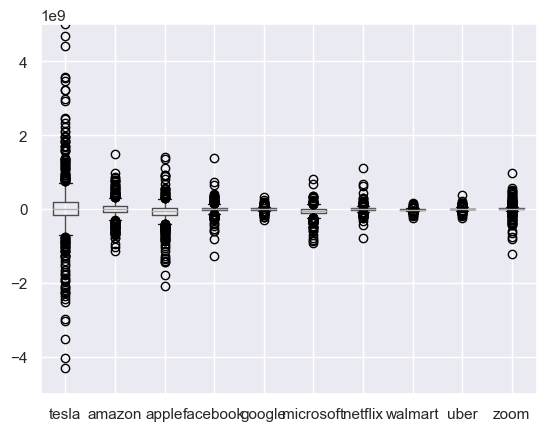

In [ ]:
# Use box plot to visualize the 5-number series
returns_df.boxplot()
plt.ylim(-5000000000, 5000000000)
plt.show()

There are outliers in the returns distribution. However, these outliers are acceptable as they often occur as a result of market forces, spike, etc and as expected, they do significantly affect the results. Hence, we would do nothing to the outliers.

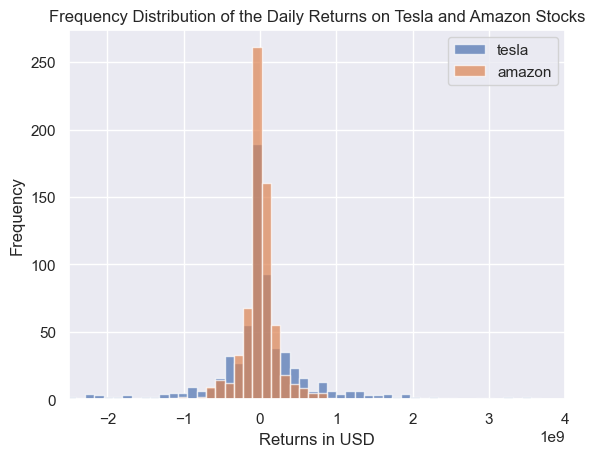

In [ ]:
returns_df[['tesla', 'amazon']].plot(kind='hist', bins=125, alpha=0.7)
plt.xlim(-2500000000, 4000000000)
plt.title("Frequency Distribution of the Daily Returns on Tesla and Amazon Stocks")
plt.xlabel('Returns in USD')
plt.show()

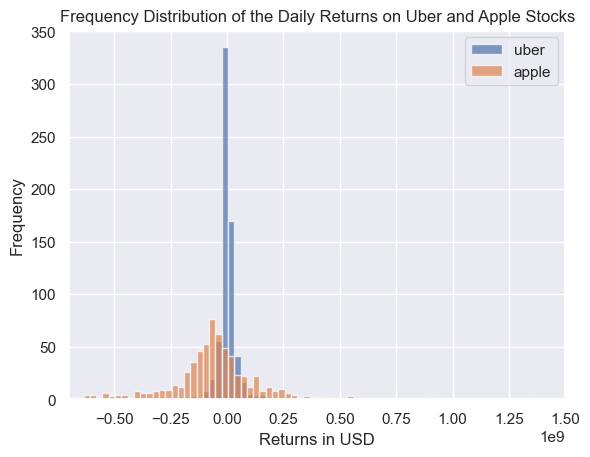

In [ ]:
returns_df[['uber', 'apple']].plot(kind='hist', bins=125, alpha=0.7)
plt.xlim(-700000000, 1500000000)
plt.title("Frequency Distribution of the Daily Returns on Uber and Apple Stocks")
plt.xlabel('Returns in USD')
plt.show()

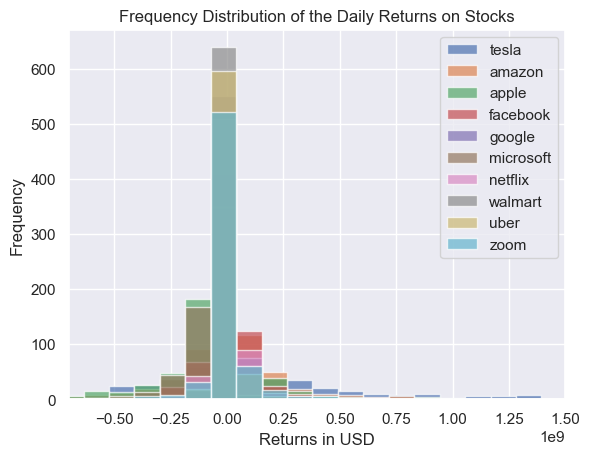

In [ ]:
returns_df.plot(kind='hist', bins=135, alpha=0.7)
plt.xlim(-700000000, 1500000000)
plt.title("Frequency Distribution of the Daily Returns on Stocks")
plt.xlabel('Returns in USD')
plt.show()

#### performance dataframe

In [ ]:
performance_df = pd.read_sql_query("SELECT Date, T.performance AS tesla, Am.performance AS amazon, Ap.performance AS apple, F.performance AS facebook, G.performance AS google, M.performance AS microsoft, N.performance AS netflix, W.performance AS walmart, U.performance AS uber, Z.performance AS zoom FROM Tesla AS T INNER JOIN Amazon AS Am USING(Date) INNER JOIN Apple AS Ap USING(Date) INNER JOIN Facebook AS F USING(Date) INNER JOIN Google AS G USING(Date) INNER JOIN Microsoft AS M USING(Date) INNER JOIN Netflix AS N USING(Date) INNER JOIN Walmart AS W USING(Date) INNER JOIN Uber AS U USING(Date) INNER JOIN Zoom AS Z USING(Date);", conn)
performance_df

,Date,tesla,amazon,apple,facebook,google,microsoft,netflix,walmart,uber,zoom
0,2019-05-10,-0.10,-0.42,-2.25,0.05,0.06,-1.14,-0.16,-1.98,-1.03,4.82
1,2019-05-13,-2.20,-0.76,-3.20,-1.08,-0.88,-3.50,-2.04,-4.65,-4.56,-6.69
2,2019-05-14,1.30,0.03,-0.94,-0.99,-1.50,-2.20,-0.90,-3.94,4.13,-1.34
3,2019-05-15,1.13,2.31,0.31,3.14,3.98,-1.13,3.28,-4.41,4.65,7.97
4,2019-05-16,-0.51,1.13,-2.04,1.04,1.23,-0.84,0.82,-5.59,3.53,3.93
...,...,...,...,...,...,...,...,...,...,...,...
661,2021-12-22,4.28,1.03,1.48,-1.01,1.94,1.47,1.77,-0.07,2.49,-2.03
662,2021-12-23,5.64,0.37,0.24,1.53,0.04,0.58,-0.38,-0.22,2.00,0.34
663,2021-12-27,1.85,-0.81,1.80,2.12,0.41,2.04,-0.31,0.82,-1.12,-1.12
664,2021-12-28,-1.93,0.28,-0.49,-0.12,-1.32,-0.56,-0.69,1.53,-0.14,-1.54


In [ ]:
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       666 non-null    object 
 1   tesla      666 non-null    float64
 2   amazon     666 non-null    float64
 3   apple      666 non-null    float64
 4   facebook   666 non-null    float64
 5   google     666 non-null    float64
 6   microsoft  666 non-null    float64
 7   netflix    666 non-null    float64
 8   walmart    666 non-null    float64
 9   uber       666 non-null    float64
 10  zoom       666 non-null    float64
dtypes: float64(10), object(1)
memory usage: 57.4+ KB


In [ ]:
# 'Date' datatype to datetime
performance_df['Date'] = pd.to_datetime(performance_df['Date'])

# Asserting the change is effected by calling .info() again
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       666 non-null    datetime64[ns]
 1   tesla      666 non-null    float64       
 2   amazon     666 non-null    float64       
 3   apple      666 non-null    float64       
 4   facebook   666 non-null    float64       
 5   google     666 non-null    float64       
 6   microsoft  666 non-null    float64       
 7   netflix    666 non-null    float64       
 8   walmart    666 non-null    float64       
 9   uber       666 non-null    float64       
 10  zoom       666 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 57.4 KB


In [ ]:
# set 'Date' as index
performance_df.set_index('Date', inplace=True)

# Asserting the change is effected by calling .head() 
performance_df.head(3)

,tesla,amazon,apple,facebook,google,microsoft,netflix,walmart,uber,zoom
Date,,,,,,,,,,
2019-05-10,-0.1,-0.42,-2.25,0.05,0.06,-1.14,-0.16,-1.98,-1.03,4.82
2019-05-13,-2.2,-0.76,-3.20,-1.08,-0.88,-3.50,-2.04,-4.65,-4.56,-6.69
2019-05-14,1.3,0.03,-0.94,-0.99,-1.50,-2.20,-0.90,-3.94,4.13,-1.34


In [ ]:
performance_df.describe()

,tesla,amazon,apple,facebook,google,microsoft,netflix,walmart,uber,zoom
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.00000
mean,0.083018,-0.028348,-0.821396,0.018604,0.102658,-1.170240,0.028153,-2.119099,-0.142598,-0.04485
std,3.250781,1.478570,1.679294,1.654716,1.320194,1.604699,1.868623,1.690559,2.837245,3.36572
min,-14.670000,-4.740000,-9.060000,-7.660000,-5.910000,-7.900000,-8.080000,-7.770000,-19.840000,-17.92000
25%,-1.482500,-0.880000,-1.890000,-0.900000,-0.620000,-2.117500,-1.057500,-3.417500,-1.685000,-1.70000
50%,0.070000,0.000000,-0.750000,0.030000,0.135000,-1.145000,0.035000,-2.125000,-0.265000,0.00500
75%,1.762500,0.850000,0.247500,1.040000,0.940000,-0.122500,1.120000,-0.952500,1.290000,1.66750
max,13.630000,6.150000,4.660000,6.550000,4.620000,5.530000,10.050000,4.370000,22.110000,11.80000


In [ ]:
# confirm there are no missing values (as seen on .info()) using .isna()
performance_df.isna().sum()

tesla        0
amazon       0
apple        0
facebook     0
google       0
microsoft    0
netflix      0
walmart      0
uber         0
zoom         0
dtype: int64

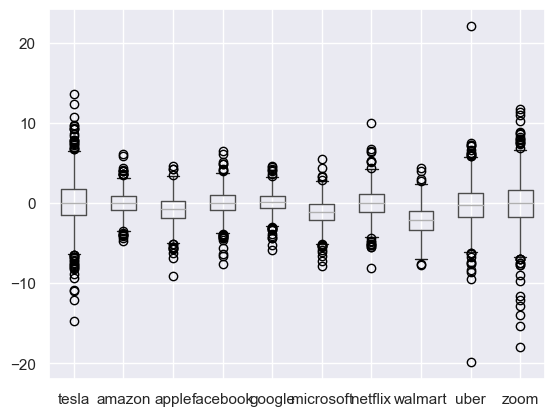

In [ ]:
# Use box plot to visualize the 5-number series

performance_df.boxplot()
plt.show()

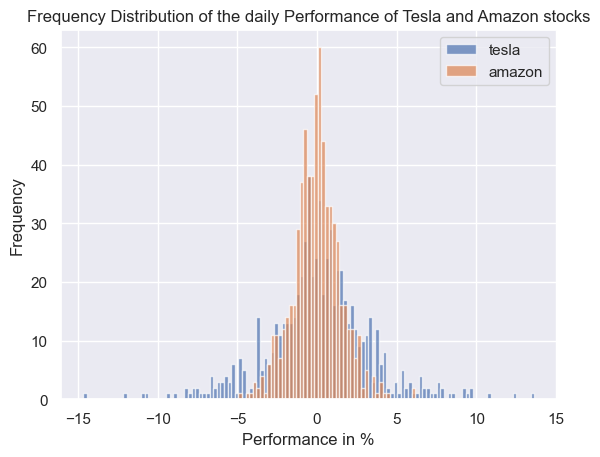

In [ ]:
performance_df[['tesla', 'amazon']].plot(kind='hist', bins=125, alpha=0.7)
plt.title('Frequency Distribution of the daily Performance of Tesla and Amazon stocks')
plt.xlabel('Performance in %')
plt.show()

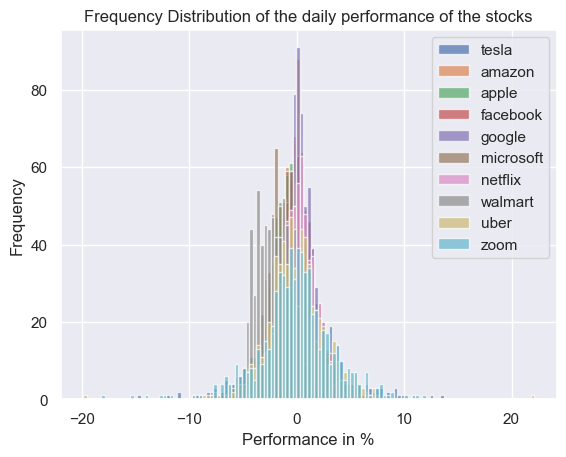

In [ ]:
performance_df.plot(kind='hist', bins=125, alpha=0.7)
plt.title("Frequency Distribution of the daily performance of the stocks")
plt.xlabel('Performance in %')
plt.show()

### Compute a 6 months moving average on the tables

In [ ]:
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose

#### returns dataframe

In [ ]:
# Average bi-yearly returns 
returns_avg = returns_df.resample('6M').mean()
returns_avg

,tesla,amazon,apple,facebook,google,microsoft,netflix,walmart,uber,zoom
Date,,,,,,,,,,
2019-05-31,-1.655992e+07,-1.290233e+07,-1.236273e+08,2.033333e+06,2.949740e+06,-6.934708e+07,-2.787736e+06,-3.246201e+07,-3.175998e+06,6.570689e+05
2019-11-30,7.806615e+06,-3.758990e+06,-1.018530e+08,-7.448180e+06,1.008865e+06,-8.149895e+07,-6.352995e+06,-2.428431e+07,2.651964e+05,-1.243187e+06
2020-05-31,1.819838e+07,2.899540e+07,-1.114777e+08,7.579828e+06,4.489508e+06,-1.070068e+08,9.482520e+06,-2.717874e+07,4.133318e+06,6.770854e+06
2020-11-30,5.431374e+07,-2.849631e+07,-1.545578e+08,8.371002e+06,-1.032836e+06,-8.450593e+07,6.234896e+06,-2.144123e+07,2.044282e+06,1.717664e+07
2021-05-31,6.766962e+07,-2.482293e+07,-8.669181e+07,1.070278e+06,4.104513e+06,-4.140412e+07,2.201803e+06,-1.791335e+07,-4.760777e+06,-1.873119e+07
2021-11-30,6.997045e+07,1.667995e+07,9.193770e+06,-4.371980e+06,-8.958169e+05,-6.886123e+06,4.794311e+06,-6.256979e+06,-9.325804e+05,-4.208706e+06
2022-05-31,-1.163172e+08,-1.894787e+07,3.447057e+07,7.367708e+05,3.876214e+05,-2.708021e+06,-1.171284e+07,-2.613818e+06,8.648242e+06,-2.365232e+06


#### performance dataframe

In [ ]:
performance_avg = performance_df.resample('6M').mean()
performance_avg

,tesla,amazon,apple,facebook,google,microsoft,netflix,walmart,uber,zoom
Date,,,,,,,,,,
2019-05-31,-0.560667,-0.158667,-1.996000,0.062000,0.040667,-2.382667,-0.140000,-3.952667,0.048667,0.238667
2019-11-30,0.172126,-0.056535,-1.754724,-0.084724,0.078189,-2.408031,-0.023858,-3.841890,-0.353071,-0.406299
2020-05-31,0.130887,0.183065,-0.964919,0.138629,0.162419,-1.627661,0.209839,-2.801532,0.100645,0.511613
2020-11-30,0.085156,-0.125156,-0.868516,0.016953,0.075313,-1.155156,0.016563,-2.076484,0.007031,0.233594
2021-05-31,-0.027097,-0.155806,-0.594355,0.005323,0.155645,-0.599597,-0.042097,-1.425726,-0.320323,-0.335161
2021-11-30,0.231094,0.056797,0.033984,-0.000859,0.056641,-0.117266,0.083750,-0.581250,-0.289062,-0.203281
2022-05-31,-0.575500,-0.197500,0.295500,0.115500,0.075000,0.061500,-0.488000,0.013000,0.624000,-0.380500


Percentage change in returns for tesla is 602.4021377402942
Percentage change in returns for amazon is 46.85614924088043
Percentage change in returns for apple is -127.8826432752908
Percentage change in returns for facebook is -63.76536718560014
Percentage change in returns for google is -86.85913498444579
Percentage change in returns for microsoft is -96.09497417409966
Percentage change in returns for netflix is 320.1561142566396
Percentage change in returns for walmart is -91.948071258385
Percentage change in returns for uber is -372.3000087878943
Percentage change in returns for zoom is -459.9670543858636


Percentage change in performance for tesla is 2.6456599286563467
Percentage change in performance for amazon is 24.47478991596639
Percentage change in performance for apple is -114.80460921843687
Percentage change in performance for facebook is 86.2903225806452
Percentage change in performance for google is 84.4262295081967
Percentage change in performance for microsoft is -102.5811415780638
Percentage change in performance for netflix is 248.5714285714285
Percentage change in performance for walmart is -100.32889188733346
Percentage change in performance for uber is 1182.191780821918
Percentage change in performance for zoom is -259.42737430167597


In [ ]:
(performance_avg['walmart'][-1] - performance_avg['walmart'][0])/performance_avg['walmart'][0] * 100

-100.32889188733346

### Visualize the bi-yearly distribution of the companies' returns and performance

#### 6 months average returns

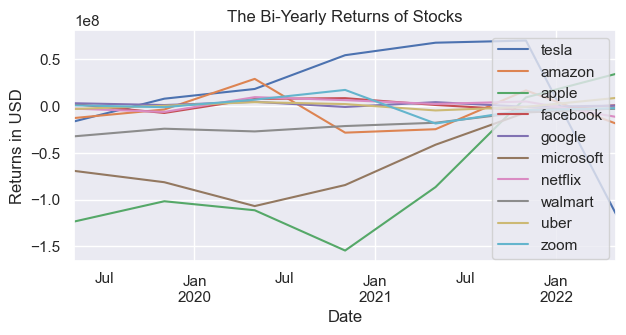

In [ ]:
returns_avg.plot(figsize=(7,3))
plt.title('The Bi-Yearly Returns of Stocks')
plt.ylabel('Returns in USD')
plt.show()

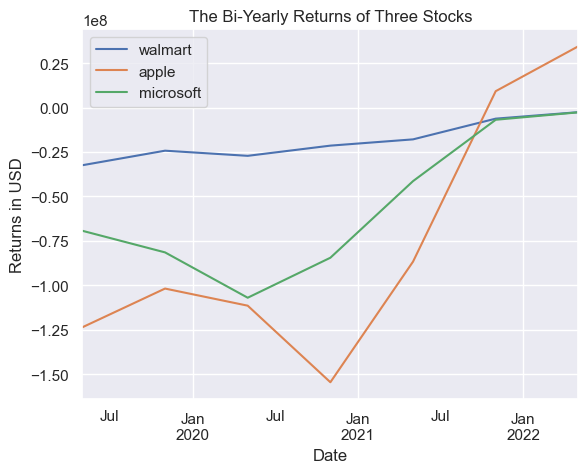

In [ ]:
returns_avg[['walmart', 'apple', 'microsoft']].plot()
plt.title('The Bi-Yearly Returns of Three Stocks')
plt.ylabel('Returns in USD')
plt.show()

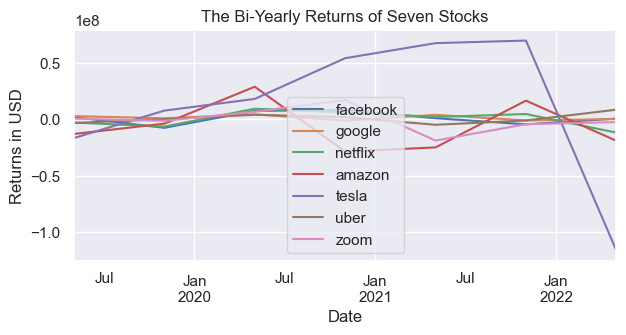

In [ ]:
returns_avg[['facebook', 'google', 'netflix', 'amazon', 'tesla', 'uber', 'zoom']].plot(figsize=(7,3))
plt.title('The Bi-Yearly Returns of Seven Stocks')
plt.ylabel('Returns in USD')
plt.show()

In [ ]:
# mean return over the entire period 
returns_avg.mean()

tesla        1.215452e+07
amazon      -6.179010e+06
apple       -7.636332e+07
facebook     1.138722e+06
google       1.573085e+06
microsoft   -5.619386e+07
netflix      2.657079e+05
walmart     -1.887863e+07
uber         8.888119e+05
zoom        -2.776785e+05
dtype: float64

#### 6 months average performance

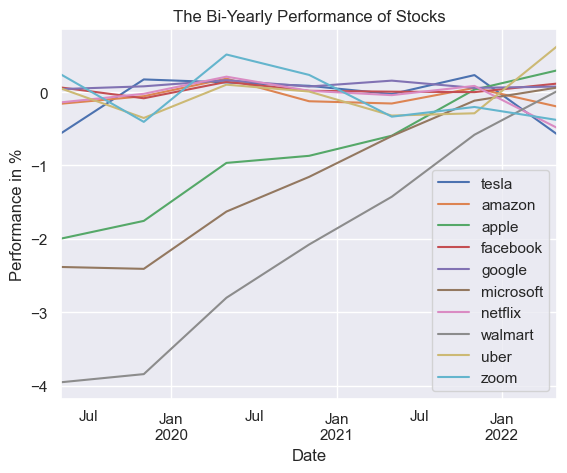

In [ ]:
performance_avg.plot()
plt.title('The Bi-Yearly Performance of Stocks')
plt.ylabel('Performance in %')
plt.show()

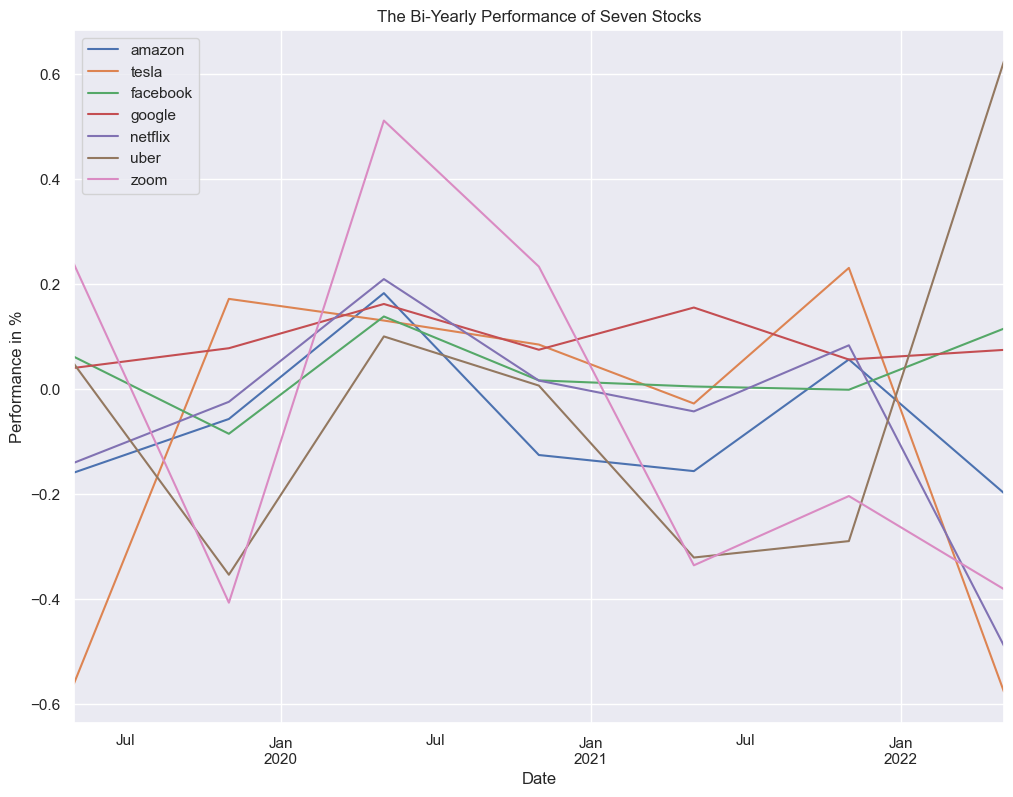

In [ ]:
performance_avg[['amazon', 'tesla', 'facebook', 'google', 'netflix', 'uber', 'zoom']].plot(figsize=(12, 9))
plt.title('The Bi-Yearly Performance of Seven Stocks')
plt.ylabel('Performance in %')
plt.show()

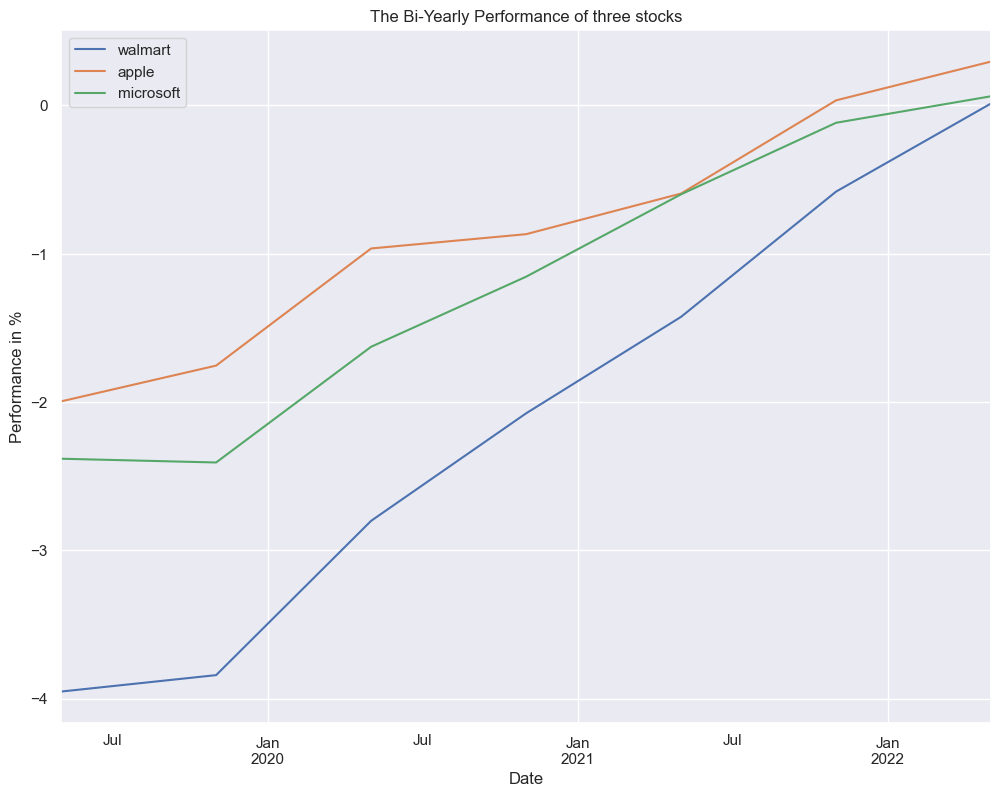

In [ ]:
performance_avg[['walmart', 'apple', 'microsoft']].plot(figsize=(12, 9))
plt.title('The Bi-Yearly Performance of Three Stocks')
plt.ylabel('Performance in %')
plt.show()

**Key Points** 
- Amazon, Zoom, Walmart, Apple and Microsoft have recorded average negative returns over the period under consideration i.e.  from 2019-05-31 to 2022-05-31. 
- However, Walmart, Apple and Microsoft are recovering from this loss as they have shown a fairly fairly steady positive growth while Amazon and Zoom keeps fluacting bi-yearly.
- During the same period, the other stocks ('amazon', 'tesla', 'facebook', 'google', 'netflix', 'uber', 'zoom') recorded an average positive return
- Unfortunately, they could not find their feet as they struggle to record a steady growth (the zig zag movement as shown in the Performance Chart)





In [ ]:
# This is the change in average returns between start and end of period. No info about trend in the average returns.
for col in returns_avg.columns:
    chng_avg_returns = (returns_avg[col][-1] - returns_avg[col][0])/returns_avg[col][0] * 100
    print('Percentage change in avg returns for', col, 'is', str(chng_avg_returns))
    
print()    

# This is the change in average performance between start and end of period. No info about its trend.
for col in performance_avg.columns:
    chng_avg_performance = (performance_avg[col][-1] - performance_avg[col][0])/performance_avg[col][0] * 100
    print('Percentage change in avg performance for', col, 'is', str(chng_avg_performance))    

Percentage change in avg returns for tesla is 602.4021377402942
Percentage change in avg returns for amazon is 46.85614924088043
Percentage change in avg returns for apple is -127.8826432752908
Percentage change in avg returns for facebook is -63.76536718560014
Percentage change in avg returns for google is -86.85913498444579
Percentage change in avg returns for microsoft is -96.09497417409966
Percentage change in avg returns for netflix is 320.1561142566396
Percentage change in avg returns for walmart is -91.948071258385
Percentage change in avg returns for uber is -372.3000087878943
Percentage change in avg returns for zoom is -459.9670543858636

Percentage change in avg performance for tesla is 2.6456599286563467
Percentage change in avg performance for amazon is 24.47478991596639
Percentage change in avg performance for apple is -114.80460921843687
Percentage change in avg performance for facebook is 86.2903225806452
Percentage change in avg performance for google is 84.42622950819

### Check for correlation between returns of the various companies using Pearson Correlation Coefficient and Heat Map

In [ ]:
performance_avg.corr()


,tesla,amazon,apple,facebook,google,microsoft,netflix,walmart,uber,zoom
tesla,1.000000,0.659269,0.009229,-0.489112,0.345768,-0.036181,0.824587,-0.072919,-0.712503,0.049305
amazon,0.659269,1.000000,0.007043,0.172812,0.387498,-0.116663,0.782250,-0.135570,-0.251927,0.467077
apple,0.009229,0.007043,1.000000,0.306678,0.119982,0.980614,-0.297551,0.987397,0.362072,-0.354187
facebook,-0.489112,0.172812,0.306678,1.000000,0.269748,0.242581,-0.199918,0.257726,0.791609,0.538191
google,0.345768,0.387498,0.119982,0.269748,1.000000,0.086239,0.391735,0.051488,-0.116246,0.168288
microsoft,-0.036181,-0.116663,0.980614,0.242581,0.086239,1.000000,-0.325501,0.995766,0.293251,-0.397092
netflix,0.824587,0.782250,-0.297551,-0.199918,0.391735,-0.325501,1.000000,-0.382553,-0.666895,0.515491
walmart,-0.072919,-0.135570,0.987397,0.257726,0.051488,0.995766,-0.382553,1.000000,0.353031,-0.417771
uber,-0.712503,-0.251927,0.362072,0.791609,-0.116246,0.293251,-0.666895,0.353031,1.000000,0.167987
zoom,0.049305,0.467077,-0.354187,0.538191,0.168288,-0.397092,0.515491,-0.417771,0.167987,1.000000


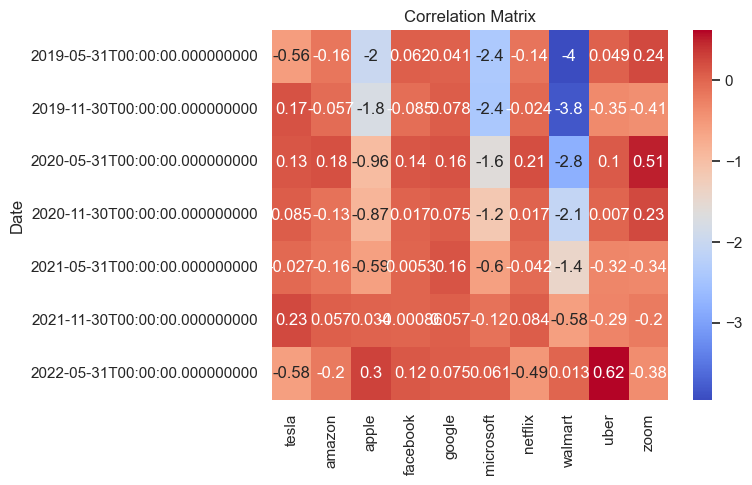

In [ ]:
sns.heatmap(performance_avg, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

### Write returns and perfrormance dataframe to the database

In [ ]:
returns_avg.to_sql("Avg_Returns_6mths", conn, if_exists="replace")

7

In [ ]:
# Assert the operation was successful
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('Amazon',), ('Apple',), ('Facebook',), ('Google',), ('Microsoft',), ('Netflix',), ('Tesla',), ('Uber',), ('Walmart',), ('Zoom',), ('Avg_Returns_6mths',)]


In [ ]:
%%sql

SELECT *
FROM Avg_Returns_6mths

 * sqlite:///stocks.db
Done.


Date,tesla,amazon,apple,facebook,google,microsoft,netflix,walmart,uber,zoom
2019-05-31 00:00:00,-16559916.950666666,-12902330.424666667,-123627332.596,2033333.0153333342,2949740.2533333325,-69347077.65666667,-2787736.1066666674,-32462011.368666664,-3175997.8433333337,657068.947333333
2019-11-30 00:00:00,7806614.568740157,-3758989.6680314955,-101852967.97173229,-7448179.904173229,1008865.211023622,-81498946.24559055,-6352994.867874016,-24284310.432204723,265196.3603937009,-1243186.7618110236
2020-05-31 00:00:00,18198377.71887097,28995400.26532258,-111477729.02580646,7579828.341935485,4489508.073387097,-107006831.4842742,9482520.25064516,-27178742.56395161,4133318.2506451616,6770854.281612904
2020-11-30 00:00:00,54313736.757656254,-28496305.852734372,-154557760.73617187,8371001.917031249,-1032835.8070312499,-84505928.2790625,6234896.0815624995,-21441230.689296875,2044282.007421875,17176638.245625
2021-05-31 00:00:00,67669615.23322581,-24822933.679596774,-86691812.37935485,1070278.313306452,4104513.294032258,-41404119.76145162,2201803.011129032,-17913347.37362903,-4760777.148709677,-18731186.544112906
2021-11-30 00:00:00,69970448.32859376,16679954.278593749,9193770.170234375,-4371979.641249999,-895816.9038281247,-6886122.611875001,4794310.665703125,-6256978.518046875,-932580.3970312502,-4208705.658437501
2022-05-31 00:00:00,-116317210.6695,-18947865.624,34470568.138500005,736770.7519999985,387621.3850000001,-2708021.2920000018,-11712843.7015,-2613818.0235,8648242.4065,-2365231.7350000003


In [ ]:
performance_avg.to_sql("Avg_Performance_6mths", conn, if_exists="replace")

7

In [ ]:
# Assert the operation was successful
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('Amazon',), ('Apple',), ('Facebook',), ('Google',), ('Microsoft',), ('Netflix',), ('Tesla',), ('Uber',), ('Walmart',), ('Zoom',), ('Avg_Returns_6mths',), ('Avg_Performance_6mths',)]


In [ ]:
%%sql

SELECT Date, netflix, tesla, amazon, uber
FROM Avg_Returns_6mths
WHERE Date = (SELECT Date FROM Avg_Performance_6mths WHERE netflix = (SELECT MIN(netflix) FROM Avg_Performance_6mths)) 

 * sqlite:///stocks.db
Done.


Date,netflix,tesla,amazon,uber
2022-05-31 00:00:00,-11712843.7015,-116317210.6695,-18947865.624,8648242.4065


In [ ]:
%%sql

SELECT Date, netflix, tesla, amazon, uber
FROM Avg_Returns_6mths
WHERE Date = (SELECT Date FROM Avg_Performance_6mths WHERE netflix = (SELECT MAX(netflix) FROM Avg_Performance_6mths)) 

 * sqlite:///stocks.db
Done.


Date,netflix,tesla,amazon,uber
2020-05-31 00:00:00,9482520.25064516,18198377.71887097,28995400.26532258,4133318.2506451616


Using **netflix** as a case study

From the heat map and correlation coefficients, tesla and amazons have a strong positive linear relationship; i.e. they moves in the same direction with netflix while uber have a fairly strong negative linear relationship i.e. they move in opposite direction. 

Hence, the results of the queries above, which displays the returns on tesla, amazon, uber and netflix when netflix is at worst and best performance respectively is in agreement with the deductions from the heatmap

**Finally, we can select the Open and Close prices for Tesla, Amazon and Uber when the returns on netflix is positive**

In [ ]:
%%sql
SELECT Date, T.performance AS T_performance, A.performance AS A_performance, U.performance AS U_performance
FROM Tesla AS T
INNER JOIN Amazon AS A
USING(Date)
INNER JOIN Uber AS U 
USING(Date)
WHERE Date IN (
    SELECT Date 
    FROM Netflix
    WHERE performance > 0
);

 * sqlite:///stocks.db
Done.


Date,T_performance,A_performance,U_performance
2019-05-15,1.13,2.31,4.65
2019-05-16,-0.51,1.13,3.53
2019-05-21,3.57,-0.93,-1.2
2019-05-22,-3.31,0.42,0.48
2019-05-28,-1.32,0.2,-1.83
2019-05-30,-0.28,-0.5,-0.68
2019-06-04,6.46,1.75,0.44
2019-06-05,-1.06,-0.64,4.73
2019-06-06,0.73,0.95,-0.18
2019-06-07,-0.24,2.24,-1.72


In [ ]:
%%sql
SELECT Date, (T.Close - T.Open) AS T_diff, A.Close - A.Open AS A_diff, U.Close - U.Open AS U_diff
FROM Tesla AS T
INNER JOIN Amazon AS A
USING(Date)
INNER JOIN Uber AS U 
USING(Date)
WHERE Date IN (
    SELECT Date 
    FROM Netflix
    WHERE returns > 0
)
;

 * sqlite:///stocks.db
Done.


Date,T_diff,A_diff,U_diff
2019-05-15,0.5260010000000008,43.200072999999975,1.9200019999999967
2019-05-16,-0.23199900000000184,21.630004999999983,1.5200000000000031
2019-05-21,1.4640010000000032,-17.270019000000048,-0.5
2019-05-22,-1.2739990000000034,7.900024999999914,0.20000100000000032
2019-05-28,-0.5,3.6800539999999273,-0.75
2019-05-30,-0.10599899999999707,-9.170043999999962,-0.2700010000000006
2019-06-04,2.5,30.320068999999876,0.18999900000000025
2019-06-05,-0.4179989999999947,-11.09997599999997,2.130001
2019-06-06,0.3019990000000021,16.65002400000003,-0.08000200000000035
2019-06-07,-0.09999799999999937,40.33007799999996,-0.7599980000000031


In [ ]:
%%sql

SELECT MIN(Close - Open)
FROM Tesla

 * sqlite:///stocks.db
Done.


MIN(Close - Open)
-150.09997599999997


In [ ]:
cur.close()

In [ ]:
conn.close()